In [18]:
import generator_object, write_run_plot, serial_sim_tools
import numpy as np

from importlib import reload
for obj in [generator_object, write_run_plot, serial_sim_tools]:
    reload(obj)

Continuuing for John sims with rho = 6.9, N=50, T = 592 Kelvin, Z = 11, Inverse brehmmstralung, Non lte

Varying: rho, T, P, internal energy, charge state, meanfree path


In [8]:
def sim(var1, var2, var3):

    gen = generator_object.User_input()
    n_atom = 50
    rho, T_ev = var1, var2
    z = var3
    N0, N1 = 1, 501 #We are operating in 1d wih 40 nodes
    Rmin, Rmax = 0, 0.01
    p2 = 1.e-9


    gen.materials_atom(index = 1, quantum_n_max = 3, element= "sn")  
    gen.materials_region(nodes = [N0, N1], elec_temp = T_ev, qstart = True) 

    gen.materials_region_material(rho, n_atom, z, z**2) #

    gen.geometry(type = 'slab')
    gen.geometry_nodes(coordinate = "r", scaling_type  = "geom", nodes = [N0, N1], nodes_range = [Rmin, Rmax], drmin = 1.e-6, slope = -1)


    gen.sources_laser(index = 1, laser_wavelength = 1, option_1= 'value', option_2= 'history', id_value = 1, multiplier=1,)
    gen.sources_lasray(entrance_position =  10, entrance_direction_mu = 1, entrance_direction_phi = 0, fractional_power= 1, res_frac=.5)
    
    gen.sources_history(id = 1, value_multiplier = 1e18, time_multiplier = 1., pulse_type='gaussian', p1 = 5*p2, p2 = p2)

    gen.popular_switches(timestep_between_snapshot = 100, 
                        temparture_calc_heating_rates = ['temp calc = time dependant', 'heating rates = electronic'], 
                        raytrace = True, 
                        include_degeneracy = 'no degeneracy',
                        continuum_transfer_evolves_temp = True)

        
    gen.other_switches(resonant_absorption_fraction = 'constant value for each ray from lasray', 
                        subcycle_maximum = 1000,
                        do_kinetics_zone_centered = True, 
                        population_calculation = 'time dependent diffusion', 
                        control_calc_thermal_conduct = 'include thermal conduction')
    
    gen.controls(t_start = 0, t_end = 2.e-8, restart = True)

    gen.parameters(time_between_snapshots = 1e-9, initial_timestep = 1.e-14)
    
    return gen




In [9]:
var = np.array([.5, .75, 1, 1.33, 2.])

Tvals = [2*592./11600]
rhovals = 6.9*var
z_vals = [12]

combi = serial_sim_tools.combinatorics([Tvals, rhovals, z_vals])
#for comb in combi:
#    print(comb)
sims = []



for entry in combi:
    base_name = 'johnrun1'
    [var1,var2,var3] = entry
    gen = sim(var1, var2, var3)
    name = f'{base_name}_{var1}_{var2}_{var3}'
    sims.append(name)
    write_run_plot.write(name=name, longprint = False, plot_duplicates=False, object=gen)
    write_run_plot.run(name=name, longprint = False, plot_duplicates=False, object=gen)
    #write_run_plot.plot(name=name, longprint = False, plot_duplicates=False, object=gen)
serial_sim_tools.plot_all('sims_multiplot', sims)

# i'm seeing 2 minutes for 2 options, so 5*5*3 = 75 minutes maybe a bit more 


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.10206896551724139_3.45_12/johnrun1_0.10206896551724139_3.45_12.gen
running cretin with johnrun1_0.10206896551724139_3.45_12

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.10206896551724139_5.175000000000001_12/johnrun1_0.10206896551724139_5.175000000000001_12.gen
running cretin with johnrun1_0.10206896551724139_5.175000000000001_12

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.10206896551724139_6.9_12/johnrun1_0.10206896551724139_6.9_12.gen
running cretin with johnrun1_0.10206896551724139_6.9_12

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun1_0.10206896551724139_9.177000000000001_12/johnrun1_0.10206896551724139_9.177000000000001_12.gen
running cretin with johnrun1_0.10206896551724139_9.177000000000001_12

writing to /home/brewster/Desktop/cretin_package-master/Personal_experim

 

on mean free paths:
Rosseland mean absorption coefficient, including scattering, at node ir (1/cm)
Planck mean absorption coefficient, not including contributions of photoexcitations, at node ir (1/cm)

on internal energy:
Internal energy of element iz at node ir with no continuum lowering (erg/cm3).


In [11]:
# Looking for temperature, charge state, laser absorption pe unit distance, radiative heat. & other results from theoretical predictions



def sim2(var2):

    gen = generator_object.User_input()
    n_atom = 50
    rho, T_ev = 15, .1
    z = 12
    N0, N1 = 1, 501 #We are operating in 1d wih 40 nodes
    Rmin, Rmax = 0, 0.01
    p2 = 1.e-9


    gen.materials_atom(index = 1, quantum_n_max = 3, element= "sn")  
    gen.materials_region(nodes = [N0, N1], elec_temp = T_ev, qstart = True) 

    gen.materials_region_material(rho, n_atom, z, z**2) #

    gen.geometry(type = 'slab')
    gen.geometry_nodes(coordinate = "r", scaling_type  = "geom", nodes = [N0, N1], nodes_range = [Rmin, Rmax], drmin = 1.e-6, slope = -1)


    gen.sources_laser(index = 1, laser_wavelength = 1, option_1= 'value', option_2= 'history', id_value = 1, multiplier=1,)
    gen.sources_lasray(entrance_position =  10, entrance_direction_mu = 1, entrance_direction_phi = 0, fractional_power= 1, res_frac=.5)
    
    gen.sources_history(id = 1, value_multiplier = 1e18, time_multiplier = 1., pulse_type='gaussian', p1 = 5*p2, p2 = p2)

    gen.popular_switches(timestep_between_snapshot = 100, 
                        temparture_calc_heating_rates = ['temp calc = time dependant', 'heating rates = electronic'], 
                        raytrace = True, 
                        include_degeneracy = 'no degeneracy',
                        continuum_transfer_evolves_temp = True)

        
    gen.other_switches(resonant_absorption_fraction = 'constant value for each ray from lasray', 
                        subcycle_maximum = 1000,
                        do_kinetics_zone_centered = True, 
                        population_calculation = 'time dependent diffusion', 
                        control_calc_thermal_conduct = 'include thermal conduction')
    
    gen.controls(t_start = 0, t_end = 2.e-8, restart = True)

    gen.parameters(time_between_snapshots = 1e-9, initial_timestep = 1.e-14)
    
    return gen






writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun6/johnrun6.gen
running cretin with johnrun6
adding additional plot to /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun6/images
Created image folder at /home/brewster/Desktop/cretin_package-master/Personal_experiments/johnrun6/images
electron temperature log
mass density
electron number density
net energy gain due to laser absorption log


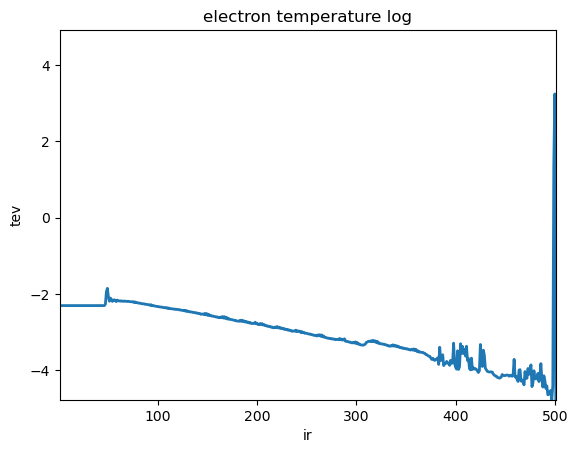

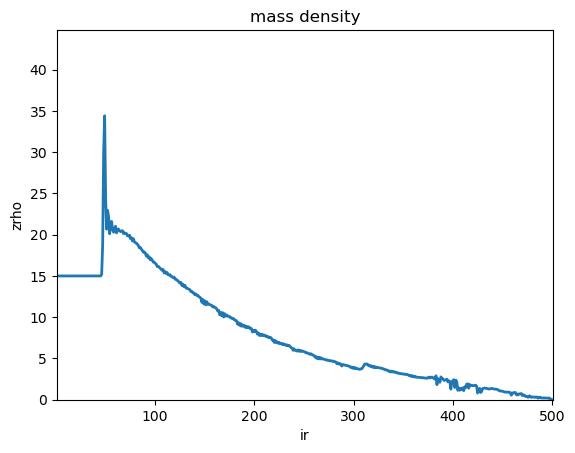

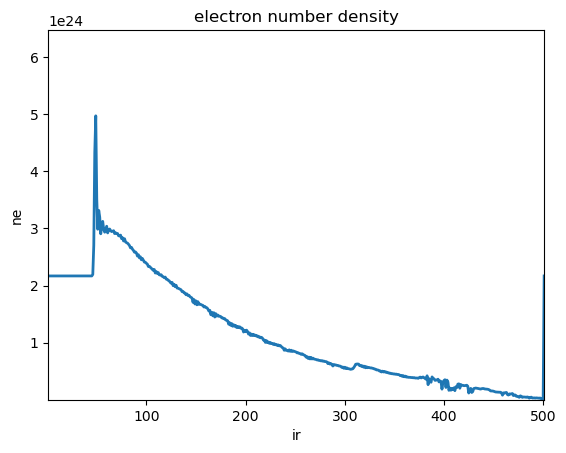

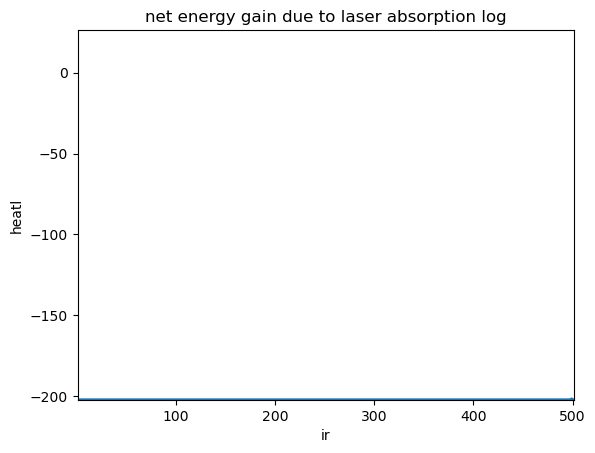

In [42]:
import generator_object, write_run_plot, serial_sim_tools, animate, plt_file
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
for obj in [generator_object, write_run_plot, serial_sim_tools, animate, plt_file]:
    reload(obj)


def sim3():

    gen = generator_object.User_input()
    n_atom = 50
    rho, T_ev = 15, .1
    z = 12
    N0, N1 = 1, 501  # We are operating in 1d wih 40 nodes
    Rmin, Rmax = 0, 0.01
    p2 = 1.e-9

    gen.materials_atom(index=1, quantum_n_max=3, element="sn")
    gen.materials_region(nodes=[N0, N1], elec_temp=T_ev, qstart=True)

    gen.materials_region_material(rho, n_atom, z, z**2)

    gen.geometry(type='slab')
    gen.geometry_nodes(coordinate="r", scaling_type="geom", nodes=[
                       N0, N1], nodes_range=[Rmin, Rmax], drmin=1.e-6, slope=-1)

    gen.sources_laser(index=1, laser_wavelength=1, option_1='value',
                      option_2='history', id_value=1, multiplier=1,)
    gen.sources_lasray(entrance_position=10, entrance_direction_mu=1,
                       entrance_direction_phi=0, fractional_power=1, res_frac=.5)

    gen.sources_history(id=1, value_multiplier=1e18,
                        time_multiplier=1., pulse_type='gaussian', p1=5*p2, p2=p2)

    gen.popular_switches(temparture_calc_heating_rates=[
                            'temp calc = steady state', 'heating rate uses internal energy rates'],
                         raytrace=True,
                         include_degeneracy='no degeneracy',
                         continuum_transfer_evolves_temp=True)

    gen.other_switches(resonant_absorption_fraction='constant value for each ray from lasray',
                       subcycle_maximum=1000,
                       do_kinetics_zone_centered=True,
                       population_calculation='time dependent diffusion',
                       control_calc_thermal_conduct='include thermal conduction')

    gen.controls(t_start=0, t_end=2.e-8, restart=True)

    gen.parameters(time_between_snapshots=1e-9, initial_timestep=1.e-14)

    gen.add_plot(title='electron temperature log', xvars={'time':[],'ir':[0,0]}, yvars={'tev':[0,0]}) # works in log
    gen.add_plot(title='mass density', xvars={'time':[],'ir':[0,0]}, yvars={'zrho':[0,0]})  # works in linear
    gen.add_plot(title='electron number density', xvars={'time':[],'ir':[0,0]}, yvars={'ne':[0,0]}) # works in linear
    gen.add_plot(title='charge state', xvars={'time':[],'ir':[0,0]}, yvars={'zbar':[0,0]}) #doesn't work 
    gen.add_plot(title='net energy gain due to radiation absorption', xvars={'time':[],'ir':[0,0]}, yvars={'heatj':[0,0]}) #doesn't work 
    gen.add_plot(title='net energy gain due to laser absorption log', xvars={'time':[],'ir':[0,0]}, yvars={'heatl':[0,0]}) # works in log
    gen.add_plot(title='radiation remperature', xvars={'time':[],'ir':[0,0]}, yvars={'trv':[0,0]})#doesn't work 
    return gen


name = 'johnrun6'
gen = sim3()

write_run_plot.write(name=name, longprint=False,plot_duplicates=False, object=gen)
write_run_plot.run(name=name, longprint = False, plot_duplicates=False, object=gen)
#write_run_plot.plot(name=name, longprint = False, plot_duplicates=False, object=gen)
write_run_plot.extra_plot(name = name, logplot = True, multiplot=False, make_animation=True)

